# SALES PREDICTION USING PYTHON

<i>Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.</i>

# About Dataset

## Description:
The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. It is required to understand the impact of ad budgets on the overall sales.

## Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\TUFAN\Downloads\codsoft\Sales_Prediction\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Information about the dataframe

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Checking for null/missing values in the dataset

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Checking for duplicate values

In [7]:
df.duplicated().sum()

0

`observation:`
- There is no missing/ duplicate values in the dataset

# EDA

## Distribution of the variables

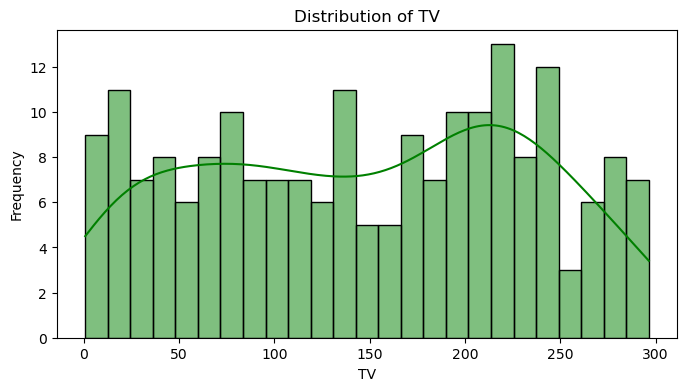

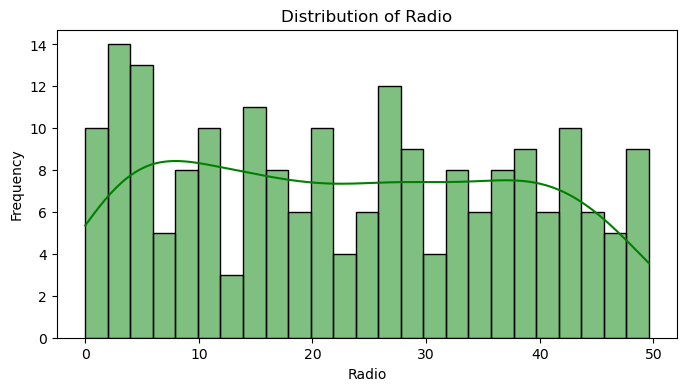

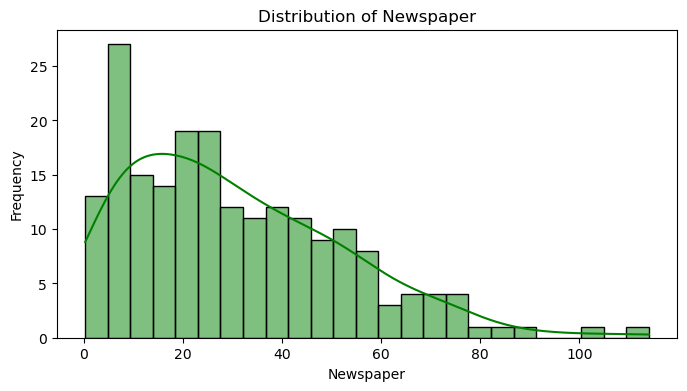

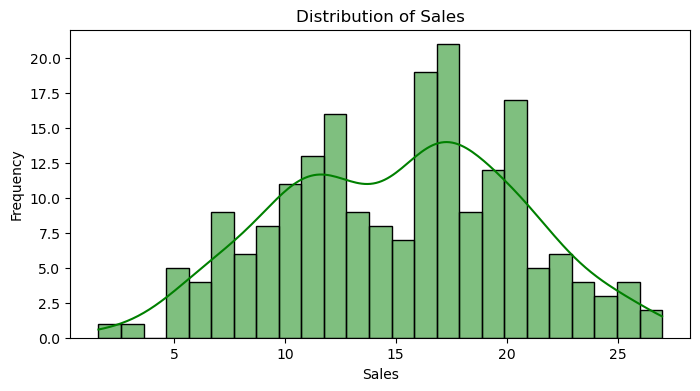

In [9]:
for feature in df.columns:
    plt.figure(figsize=(8, 4)) 
    plt.title(f'Distribution of {feature}')
    
    sns.histplot(df[feature], kde=True, bins=25, color='g')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

`Observations:`
- The TV distribution has more data points spread towards the higher values. This suggest that more money is spent TV advertisements.
- The Newspaper distribution seems to be positively skewed, with a long tail towards higher values. This suggests that higher spending on newspaper advertising is less common.

## Correlation Between different advertisements and sales

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


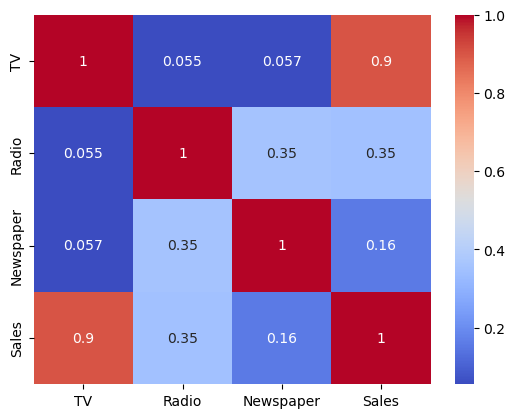

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

`Observation:`
- TV advertisements has highest impact on the sales

## Total money spent on each type of advertisement

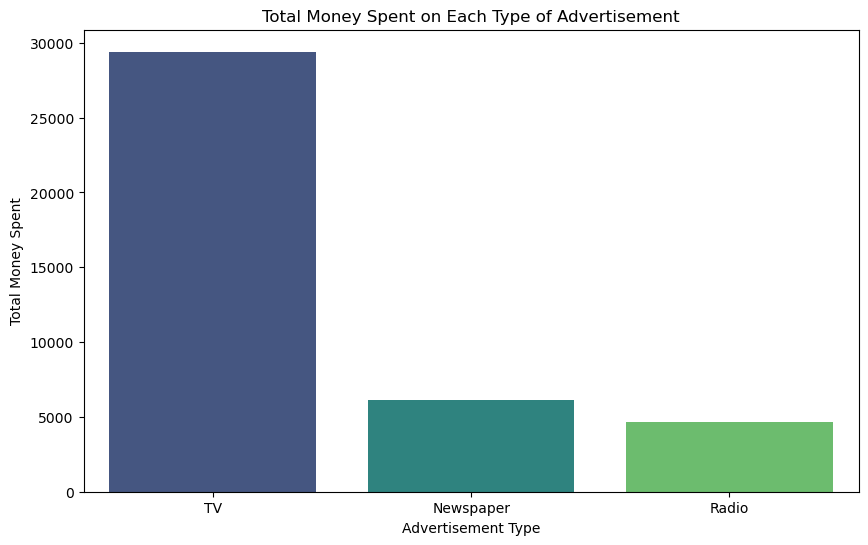

In [21]:
# Calculate total expenditure for each type of advertisement
total_tv_spend = df['TV'].sum()
total_newspaper_spend = df['Newspaper'].sum()
total_radio_spend = df['Radio'].sum()

# Data for plotting
categories = ['TV', 'Newspaper', 'Radio']
totals = [total_tv_spend, total_newspaper_spend, total_radio_spend]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=totals,palette='viridis')
plt.xlabel('Advertisement Type')
plt.ylabel('Total Money Spent')
plt.title('Total Money Spent on Each Type of Advertisement')
plt.show()


In [24]:
df['Total_spent'] = df['TV']+df['Radio']+df['Newspaper']

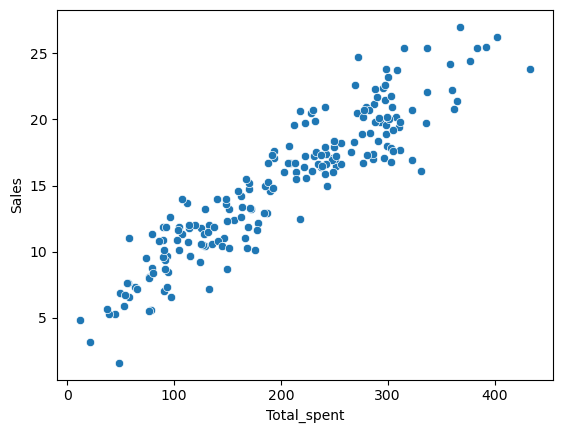

In [29]:
sns.scatterplot(x=df['Total_spent'],y=df['Sales'])
plt.show()

`Observation:`
- The scatter plot shows a positive linear correlation between Sales and Total spent. As the Total spent increases, sales increases too.This suggests that there is a positive association between advertising spending and sales.

## Checking for outliers

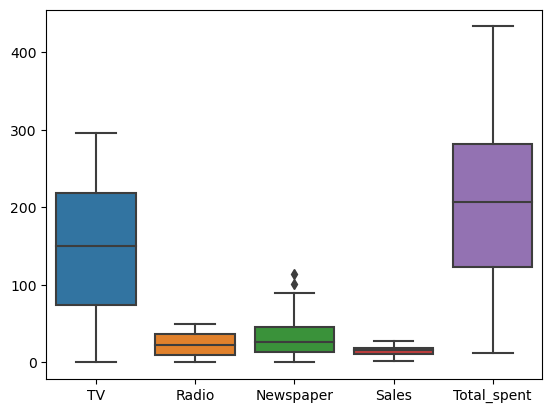

In [31]:
sns.boxplot(df)
plt.show()

## Feature and Target variable

In [32]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

## Train test split

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=11)

## Model building

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

## Model Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("Mean absolute error of train data:",mean_absolute_error(y_train,y_train_pred))
print("Mean absolute error of test data:",mean_absolute_error(y_test,y_test_pred))

print("\nMean squared error of train data:",mean_squared_error(y_train,y_train_pred))
print("Mean squared error of test data:",mean_squared_error(y_test,y_test_pred))

print("\nr2 score(Train data):",r2_score(y_train,y_train_pred))
print("\nr2 score(Test data):",r2_score(y_test,y_test_pred))



Mean absolute error of train data: 1.182133300598488
Mean absolute error of test data: 1.4085048291195874

Mean squared error of train data: 2.23500460571101
Mean squared error of test data: 3.8532129007557137

r2 score(Train data): 0.9144513153255296

r2 score(Test data): 0.873218749161135


In [42]:
lr.intercept_

4.890053786492087

In [43]:
lr.coef_

array([ 0.05431123,  0.10162066, -0.0020213 ])

# `Final Conclusion`

#### Model Performance Metrics
1. **Mean Absolute Error (MAE)**:
   - Train Data: 1.182
   - Test Data: 1.409
2. **Mean Squared Error (MSE)**:
   - Train Data: 2.235
   - Test Data: 3.853
3. **R-squared Score (R²)**:
   - Train Data: 0.914
   - Test Data: 0.873

#### Interpretation of Results
1. **Model Accuracy**:
   - The **R-squared scores** indicate that our model explains 91.4% of the variability in the training data and 87.3% in the test data. These high R-squared values suggest that the model is quite effective at predicting sales based on the given advertising data.
   - The **MAE** and **MSE** are higher for the test data compared to the training data, indicating that the model performs slightly worse on unseen data but still maintains a good level of accuracy.

2. **Positive Linear Correlation**:
   - The scatter plot shows a positive linear correlation between sales and total advertising spending. This indicates that as advertising spending increases, sales also tend to increase, demonstrating a positive association between these variables.

3. **Effectiveness of Different Advertising Channels**:
   - **TV Advertising**: TV advertisements have the highest impact on sales, making it the most effective advertising channel. This means that increased investment in TV advertising is strongly associated with increased sales.
   - **Radio Advertising**: The data for radio advertising shows a stable and evenly spread impact on sales. This suggests that while radio advertising may not have extreme effects, it represents a relatively safe and consistent advertising choice.
   - **Newspaper Advertising**: Newspaper advertising shows lower spending concentrations with fewer instances of high spending. This indicates that higher expenditures in newspaper advertising are less common and may not have a significant impact on sales compared to TV and radio advertising.

#### Recommendations
1. **Increase Investment in TV Advertising**:
   - Given its strong positive impact on sales, it is recommended to allocate a larger portion of the advertising budget to TV advertisements.

2. **Maintain Stable Investment in Radio Advertising**:
   - Radio advertising offers a stable return with less risk, making it a good choice for maintaining consistent sales.

3. **Evaluate Newspaper Advertising Strategy**:
   - Given the lower impact of newspaper advertising, it may be beneficial to reevaluate the current spending strategy and consider reallocating some of the budget to more effective channels like TV or radio.

#### Conclusion
The analysis demonstrates that advertising spending positively correlates with sales, with TV advertising having the highest impact. By strategically increasing investments in the most effective channels, the company can optimize its advertising budget to maximize sales and achieve better returns on investment.